In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import leastsq

In [3]:
def parse_txt(text_lines):
    time, ch1, ch2 = [], [], []
    for i, line in enumerate(text_lines):
        if i < 6:
            continue
        line = line.split("; ")
        try:
            time.append(float(line[0]))
            ch1.append(float(line[1]))
            ch2.append(float(line[2]))
        except:
            print("End line at {} ".format(i))
            break
    return np.asarray(time), np.asarray(ch1), np.asarray(ch2)

def load_text(path):
    with open(path) as f:
        return [l.replace("\n", "") for l in f.readlines()]



#generate data
data_path = "./raw_data/meas_scope_20210820_145720_3.3umQ37a_83mA_21.83C_PZTMod30Hz_9Vpp_14.0M_t_5MHzLP_beat9618.65MHz_AOM(TG0.20V_200x).txt"
time, raw_data, triangle_waves = parse_txt(load_text(data_path))

In [4]:
def triangle_wave(x,p):
    a,b,c,T = p
    y = np.where(np.mod(x-b,T)<T/2, -4/T*(np.mod(x-b,T))+1+c/a, 0)
    y = np.where(np.mod(x-b,T)>=T/2, 4/T*(np.mod(x-b,T))-3+c/a, y)
    return a*y

def residuals(p,y,x):
    return y - triangle_wave(x,p)

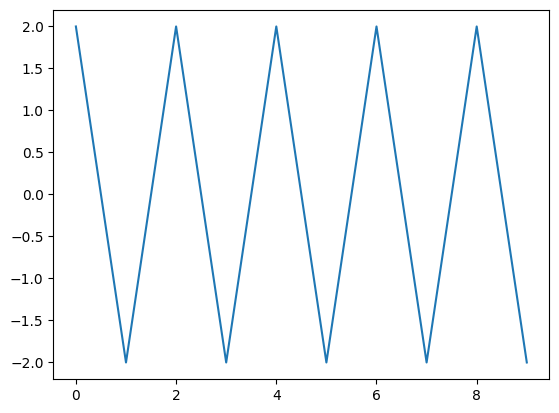

In [21]:
#test function
p = [2,0,0,2]
#[amp,x_bias,y_bias,period]
x = np.arange(0,10,1)
y = triangle_wave(x,p)

plt.plot(x,y)

In [28]:
p0 = [0.3,-390217,0.1,468604] # 初始参数
x = np.arange(0,len(triangle_waves),1)
plsq = leastsq(residuals,p0,args=(triangle_waves,x))
print(plsq)

(array([-1.42153609e-01, -3.12816213e+05,  1.24483184e-01,  4.68750197e+05]), 3)


In [29]:
# fitting data
z = np.arange(0,len(triangle_waves),1)
fit_y = triangle_wave(z,plsq[0])


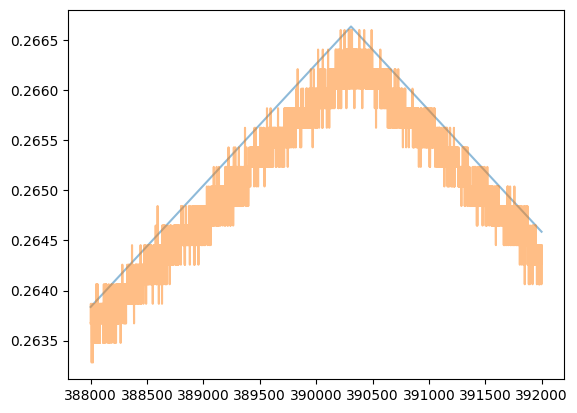

In [36]:
start = 388000
stop = 392000
x= np.arange(start,stop,1)
y1 = fit_y[start:stop]
y2= triangle_waves[start:stop]
plt.plot(x,y1,alpha = 0.5)
plt.plot(x,y2,alpha = 0.5)

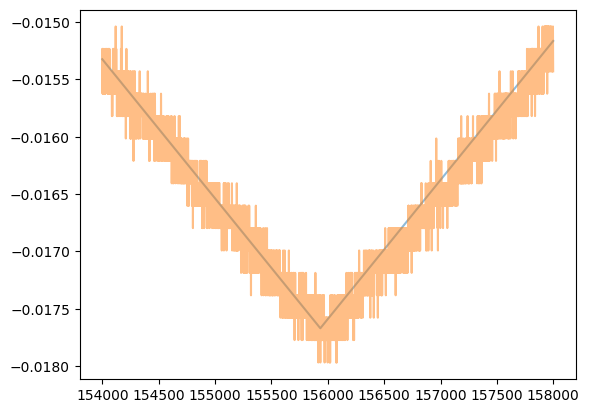

In [46]:
start = 154000
stop = 158000
x= np.arange(start,stop,1)
y1 = fit_y[start:stop]
y2= triangle_waves[start:stop]
plt.plot(x,y1,alpha = 0.5)
plt.plot(x,y2,alpha = 0.5)

# Assign data

In [37]:
up = np.arange(round(plsq[0][1]+plsq[0][3]),len(triangle_waves),round(plsq[0][3]))
down = up + round(plsq[0][3]/2)

In [39]:
#start save
for i in range(len(up)-1):
    np.savetxt('./simulator/B/down/'+str(i)+'.txt',raw_data[up[i]:down[i]])
    np.savetxt('./simulator/B/up/'+str(i)+'.txt',raw_data[down[i]:up[i+1]])  
               

In [40]:
tmp=[]
for i in range(len(up)):
    tmp.append([up[i],down[i]])
np.savetxt('./simulator/B/index.txt',tmp)